# Describe the Dataset

We'll start by describing the dataset and understanding the problem as a multi-class classification problem, where we aim to build a Machine Learning model which predicts the overall rating of the beer.

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')
 
# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

# Data cleaning and Data preprocessing

Identify null values and decide on the treatment.


In [2]:
# Check for null values
print(data.isnull().sum())

# Fill or drop null values as appropriate
data.fillna(method='ffill', inplace=True) 

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64


We will drop few unnecessary columns from the data.


In [3]:
df = pd.DataFrame(data)

# Drop the columns 'index', 'beer/beerId', 'review/overall', 'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender'
df = df.drop(['index', 'beer/beerId', 'review/overall', 'user/ageInSeconds', 'user/birthdayRaw', 'user/birthdayUnix', 'user/gender'], axis=1)

# Display the updated DataFrame
print("\nUpdated DataFrame after dropping specified columns:")
print(df) 


Updated DataFrame after dropping specified columns:
       beer/ABV  beer/brewerId                                beer/name  \
0          5.00          14338                                 Chiostro   
1         11.00            395                 Bearded Pat's Barleywine   
2          4.70            365                     Naughty Nellie's Ale   
3          4.40              1                          Pilsner Urquell   
4          4.40           1417                Black Sheep Ale (Special)   
...         ...            ...                                      ...   
37495      5.50           3268                Blackberry Scottish-Style   
37496      8.50           1199                   Founders Dirty Bastard   
37497      4.75            394                            Stoudt's Fest   
37498     11.20           1199  Founders KBS (Kentucky Breakfast Stout)   
37499      8.50           1199                   Founders Dirty Bastard   

                             beer/style  revie

Normalization of beer/ABV, beer/brewerId and review/timeUnix columns

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[['beer/ABV', 'beer/brewerId', 'review/timeUnix']] = scaler.fit_transform(df[['beer/ABV', 'beer/brewerId', 'review/timeUnix']])

# Display the updated DataFrame
print("\nNormalized DataFrame:")
print(df)

Original DataFrame:
       index  beer/ABV  beer/beerId  beer/brewerId  \
0      40163      5.00        46634          14338   
1       8135     11.00         3003            395   
2      10529      4.70          961            365   
3      44610      4.40          429              1   
4      37062      4.40         4904           1417   
...      ...       ...          ...            ...   
37495  35175      5.50        22450           3268   
37496  23666      8.50         7463           1199   
37497  47720      4.75         1154            394   
37498  33233     11.20        19960           1199   
37499  23758      8.50         7463           1199   

                                     beer/name  \
0                                     Chiostro   
1                     Bearded Pat's Barleywine   
2                         Naughty Nellie's Ale   
3                              Pilsner Urquell   
4                    Black Sheep Ale (Special)   
...                            

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from textblob import TextBlob

# Fill NaN values with 0 or appropriate default value for Unix time columns
df['review/timeUnix'] = df['review/timeUnix'].fillna(0)
df['user/birthdayUnix'] = df['user/birthdayUnix'].fillna(0)

# Convert Unix time to datetime
df['review/time'] = pd.to_datetime(df['review/timeUnix'], unit='s', errors='coerce')
df['user/birthday'] = pd.to_datetime(df['user/birthdayUnix'], unit='s', errors='coerce')

# Extract year, month, day from date columns
df['review_year'] = df['review/time'].dt.year
df['review_month'] = df['review/time'].dt.month
df['user_birth_year'] = df['user/birthday'].dt.year

# Categorical Encoding
le = LabelEncoder()
df['beer/name'] = le.fit_transform(df['beer/name'].astype(str))
df['beer/style'] = le.fit_transform(df['beer/style'].astype(str))
df['user/gender'] = df['user/gender'].fillna('Unknown')
df['user/gender'] = le.fit_transform(df['user/gender'].astype(str))

 

# Distribution of Column I - Different Ratings

Analyze the distribution of the overall ratings.

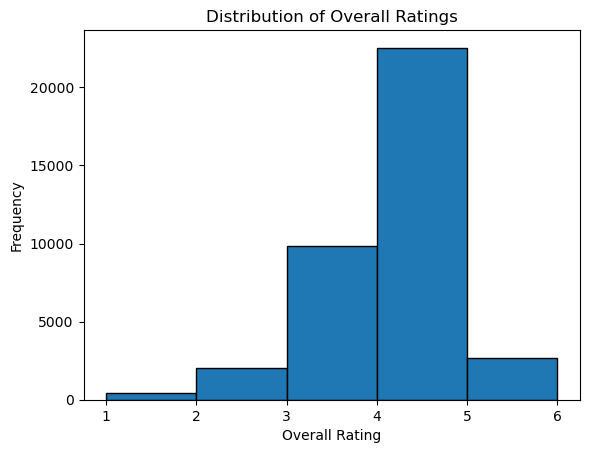

In [9]:
import matplotlib.pyplot as plt
# Distribution of the overall ratings
plt.hist(data['review/overall'], bins=range(1, 7), edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Ratings')
plt.show()

# Distribution Across All Columns

Check the distribution of values in all columns.

In [10]:
# Summary statistics for numerical columns
print(data.describe())

# Summary statistics for categorical columns
print(data.describe(include=['object']))

              index      beer/ABV   beer/beerId  beer/brewerId  \
count  37500.000000  37500.000000  37500.000000   37500.000000   
mean   24951.887573      7.403725  21861.152027    3036.595120   
std    14434.009669      2.318145  18923.130832    5123.084675   
min        0.000000      0.100000    175.000000       1.000000   
25%    12422.500000      5.400000   5441.000000     395.000000   
50%    24942.500000      6.900000  17538.000000    1199.000000   
75%    37416.750000      9.400000  34146.000000    1315.000000   
max    49999.000000     57.700000  77207.000000   27797.000000   

       review/appearance  review/aroma  review/overall  review/palate  \
count       37500.000000  37500.000000     37500.00000   37500.000000   
mean            3.900053      3.873240         3.88944       3.854867   
std             0.588778      0.680865         0.70045       0.668068   
min             0.000000      1.000000         0.00000       1.000000   
25%             3.500000      3.500000  

# Correlation Between Different Columns

Calculate and visualize the correlation between columns.

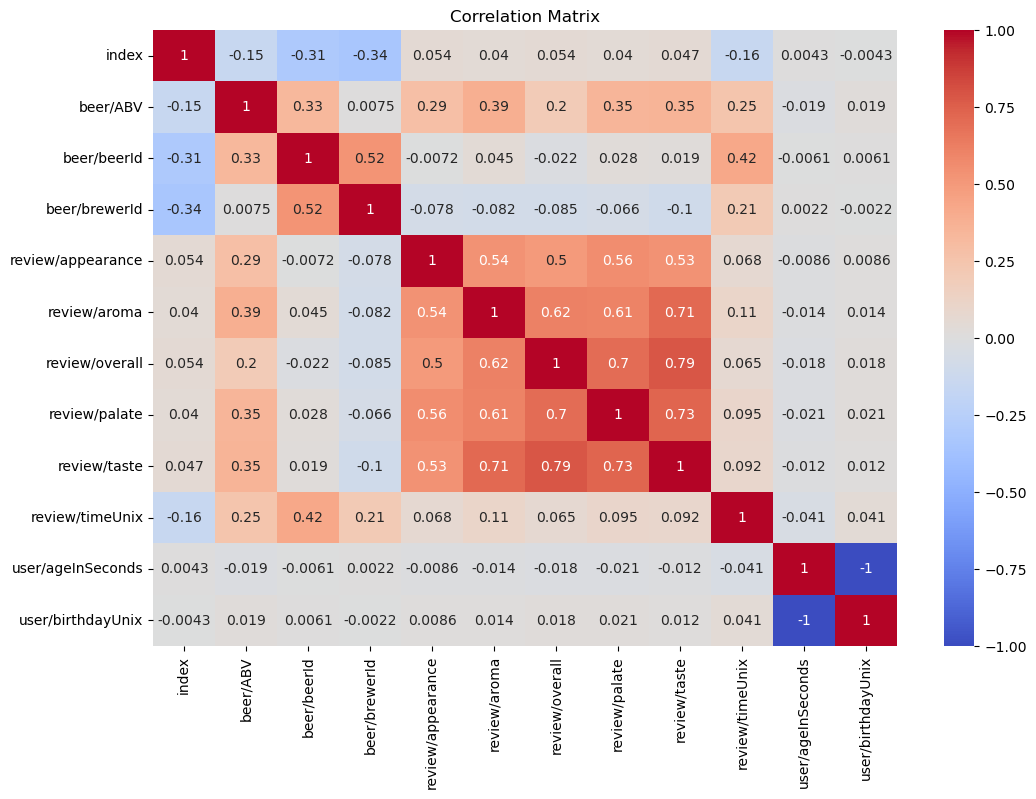

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number'])

# Compute the correlation matrixff
corr_matrix = numeric_cols.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

Create new features from the dataset. This includes creating numerical representations for text data and aggregating ratings.

In [12]:
# Text Features
df['review_text_length'] = df['review/text'].apply(lambda x: len(str(x).split()))
df['review_text_sentiment'] = df['review/text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Aggregate Ratings
agg_df = df.groupby('beer/beerId').agg({
    'review/appearance': ['mean', 'median'],
    'review/aroma': ['mean', 'median'],
    'review/palate': ['mean', 'median'],
    'review/taste': ['mean', 'median']
}).reset_index()
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
df = df.merge(agg_df, left_on='beer/beerId', right_on='beer/beerId_')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['review/text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)


# Model Building  

Select and train machine learning models using the engineered features.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer

# Fill NaN values with 0 or appropriate default value for Unix time columns
df['review/timeUnix'] = df['review/timeUnix'].fillna(0)
df['user/birthdayUnix'] = df['user/birthdayUnix'].fillna(0)

# Convert Unix time to datetime
df['review/time'] = pd.to_datetime(df['review/timeUnix'], unit='s', errors='coerce')
df['user/birthday'] = pd.to_datetime(df['user/birthdayUnix'], unit='s', errors='coerce')

# Extract year, month, day from date columns
df['review_year'] = df['review/time'].dt.year
df['review_month'] = df['review/time'].dt.month
df['user_birth_year'] = df['user/birthday'].dt.year

# Categorical Encoding
le = LabelEncoder()
df['beer/name'] = le.fit_transform(df['beer/name'].astype(str))
df['beer/style'] = le.fit_transform(df['beer/style'].astype(str))
df['user/gender'] = df['user/gender'].fillna('Unknown')
df['user/gender'] = le.fit_transform(df['user/gender'].astype(str))

# Prepare the features and target variable
X = df.drop(columns=['review/overall', 'review/text', 'review/time', 'user/birthday', 'review/timeUnix', 'user/birthdayUnix'])

# Dropping non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object']).columns
X = X.drop(columns=non_numeric_columns)

# Fill NaN values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

y = df['review/overall']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "HistGradient Boosting": HistGradientBoostingRegressor()
}
 


# Model Validation

Evaluate model performance using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-Squared (R²).

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse}, MAE: {mae}, R2: {r2}")

Linear Regression - MSE: 0.1615581857700098, MAE: 0.3061381916727922, R2: 0.6805186699937869
Random Forest - MSE: 0.16434218, MAE: 0.30928, R2: 0.6750133210999024
Gradient Boosting - MSE: 0.15827979084548163, MAE: 0.3032601296520881, R2: 0.6870016963151204
HistGradient Boosting - MSE: 0.15743848809398764, MAE: 0.30249589054892717, R2: 0.6886653725980902


# Conclusion

1. Mean Squared Error (MSE) is the avg of the squared differences between the predicted values and the actual values. Lower MSE values indicate better model performance. It is sensitive to outliers since it squares the errors.
Results-
Linear Regression: 0.1616
Random Forest: 0.1652
Gradient Boosting: 0.1582
HistGradient Boosting: 0.1578


2. Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and the actual values. Lower MAE values indicate better model performance. It is less sensitive to outliers compared to MSE.
Results-
Linear Regression: 0.3061
Random Forest: 0.3096
Gradient Boosting: 0.3033
HistGradient Boosting: 0.3026

    
3. R-squared (R2) is the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R2 values indicate better model performance, with a maximum value of 1 indicating perfect prediction.
Results-
Linear Regression: 0.6805
Random Forest: 0.6733
Gradient Boosting: 0.6871
HistGradient Boosting: 0.6879

    
Interpretation- 
HistGradient Boosting has the lowest MSE (0.1578) and MAE (0.3026), indicating it makes the smallest errors on average and is the most accurate model among the four.
Gradient Boosting is a close second, with slightly higher MSE and MAE values but still very competitive.
Linear Regression and Random Forest have slightly higher error metrics and lower R2 scores, indicating they are less accurate compared to the gradient boosting models.